In [5]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

In [2]:
iris = load_iris()
print(dir(iris))
print(iris.data[0])
print(iris.feature_names)
print(iris.target)
print(iris.target_names)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
[5.1 3.5 1.4 0.2]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [38]:
x_train, x_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size=0.1)
x_train.shape

(135, 4)

In [41]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [42]:
model.score(x_test,y_test)

1.0

In [43]:
iris.data[78]
iris.target[78]

model.predict([iris.data[78]])

array([1])

Text(195.72222222222223, 0.5, 'truth')

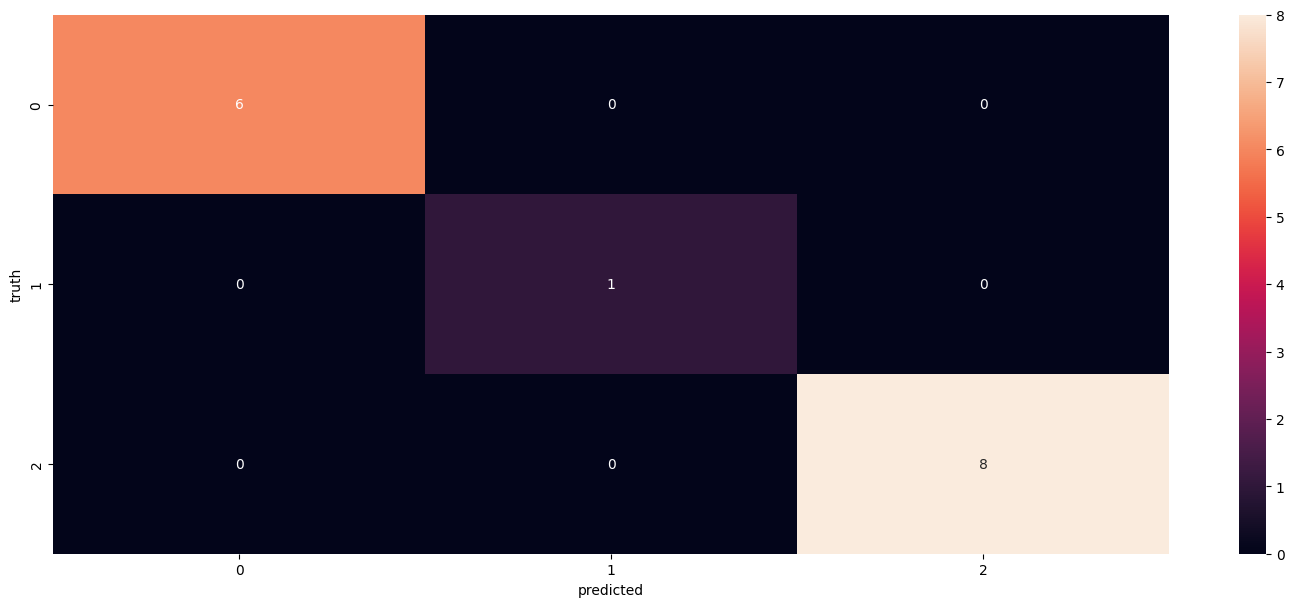

In [44]:
y_predicted = model.predict(x_test)
cn=confusion_matrix(y_test,y_predicted)
plt.figure(figsize=(18,7))
sn.heatmap(cn,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

In [15]:
data = pd.DataFrame(iris.data,columns=iris.feature_names)
data['target'] = iris.target
data['target_name'] = data.target.apply(lambda x:iris.target_names[x])
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


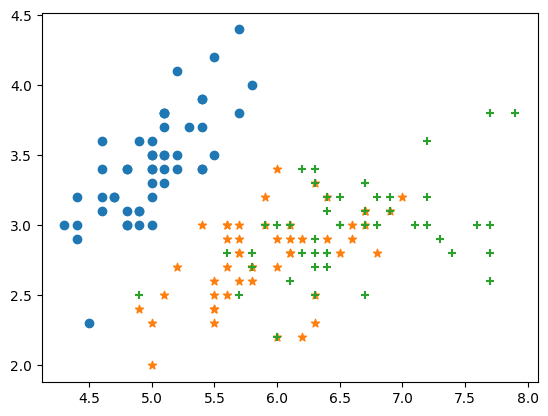

In [21]:
from matplotlib import pyplot as plt
%matplotlib inline
df0 = data[data.target==0]
df1 = data[data.target==1]
df2 = data[data.target==2]

plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'])
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],marker='*')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],marker='+')

In [32]:
x = data.drop(['target','target_name'],axis='columns')
x_train,x_test,y_train,y_test = train_test_split(x,iris.target)

In [48]:
from sklearn.svm import SVC
model = SVC(kernel='poly',degree=7)
model.fit(x_train,y_train)

SVC(degree=7, kernel='poly')

In [49]:
model.score(x_test,y_test)

0.9736842105263158